In [ ]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import cufflinks as cf
import tensorflow

from collections import *

from keras.layers import *
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Ecommerce Sentiment Analysis/Dataset/Product Review Daraz.xlsx')

In [ ]:
newdf = df.copy()

In [ ]:
df.head()

,Comments,Class,translated,sentiment
0,আমি মনে করি আমি আমার টাকা অপচয়,Negative,I think I'm a waste of my money,Negative
1,অবিশ্বাস্য মানের,Positive,incredible quality,Positive
2,আপনার টাকা নষ্ট করবেন না,Negative,Don't waste your money,Negative
3,আমাকে হতাশ করেনি,Positive,Did not disappoint me,Positive
4,আমি আপনার কাছ থেকে নিষ্ক্রিয় পণ্য পেয়েছি যা ...,Negative,I got from you inactive products that are very...,Negative


In [ ]:
df=df.drop(["Comments","Class"],axis=1)

In [ ]:
df.columns=["Sentence","Class"]

In [ ]:
df.head(10)

,Sentence,Class
0,I think I'm a waste of my money,Negative
1,incredible quality,Positive
2,Don't waste your money,Negative
3,Did not disappoint me,Positive
4,I got from you inactive products that are very...,Negative
5,I love it!,Positive
6,I got a better product at a lower price.,Positive
7,I'm very disappointed about the product.,Negative
8,I got the original product in good prices.,Positive
9,This product is quite good,Positive


In [ ]:
df.shape

(1995, 2)

In [ ]:
df.isnull().sum()

Sentence    0
Class       0
dtype: int64

In [ ]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.Class =='Negative']),
      "\nTotal Positive :",len(df[df.Class=='Positive']))

Total Comment: 1995 
Total Negative : 904 
Total Positive : 1091


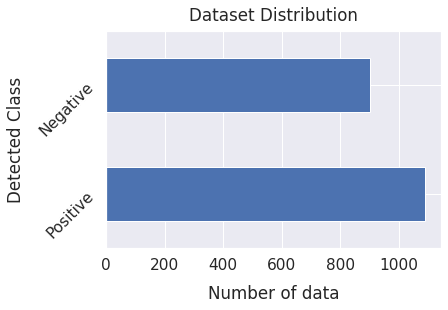

In [ ]:
sns.set(font_scale=1.4)
df['Class'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of data", labelpad=12)
plt.ylabel("Detected Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

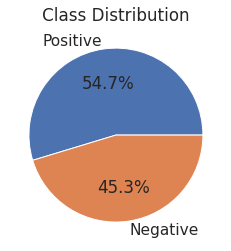

In [ ]:
class_counts = df['Class'].value_counts()
class_percents = class_counts / class_counts.sum() * 100
# Plot the pie chart
plt.pie(class_percents, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.savefig("my_plot.png")
plt.show()

# **Data Preperation and Cleaning**

### **Lower Casing**

In [ ]:
df["Lower_Case"] = df["Sentence"].str.lower()
df.head()

,Sentence,Class,Lower_Case
0,I think I'm a waste of my money,Negative,i think i'm a waste of my money
1,incredible quality,Positive,incredible quality
2,Don't waste your money,Negative,don't waste your money
3,Did not disappoint me,Positive,did not disappoint me
4,I got from you inactive products that are very...,Negative,i got from you inactive products that are very...


# **Removing Duplicate Rows**

In [ ]:
# df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1995, 3)

# **Stopwords Removal**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords

def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['Stopwords']=df['Lower_Case'].apply(process_text)

In [ ]:
df.head()

,Sentence,Class,Lower_Case,Stopwords
0,I think I'm a waste of my money,Negative,i think i'm a waste of my money,think im waste money
1,incredible quality,Positive,incredible quality,incredible quality
2,Don't waste your money,Negative,don't waste your money,dont waste money
3,Did not disappoint me,Positive,did not disappoint me,disappoint
4,I got from you inactive products that are very...,Negative,i got from you inactive products that are very...,got inactive products unexpected


# **Removing Small Texts**

In [ ]:
df['length'] = df['Stopwords'].apply(lambda x:len(x.split()))

dataset = df.loc[df.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

dataset['no_char'] = df['Stopwords'].apply(lambda cleaned: len(cleaned))

After Cleaning: 
Removed 1 Small conversations 
Total conversations: 1994


(1994, 6)

In [ ]:
dataset.head()

,Sentence,Class,Lower_Case,Stopwords,length,no_char
0,I think I'm a waste of my money,Negative,i think i'm a waste of my money,think im waste money,4,20
1,incredible quality,Positive,incredible quality,incredible quality,2,18
2,Don't waste your money,Negative,don't waste your money,dont waste money,3,16
3,Did not disappoint me,Positive,did not disappoint me,disappoint,1,10
4,I got from you inactive products that are very...,Negative,i got from you inactive products that are very...,got inactive products unexpected,4,32


# **Stemming**

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

dataset['Stemming']=dataset['Stopwords'].apply(stemming)
dataset.head(20)    

,Sentence,Class,Lower_Case,Stopwords,length,no_char,Stemming
0,I think I'm a waste of my money,Negative,i think i'm a waste of my money,think im waste money,4,20,think im waste money
1,incredible quality,Positive,incredible quality,incredible quality,2,18,incredible quality
2,Don't waste your money,Negative,don't waste your money,dont waste money,3,16,dont waste money
3,Did not disappoint me,Positive,did not disappoint me,disappoint,1,10,disappoint
4,I got from you inactive products that are very...,Negative,i got from you inactive products that are very...,got inactive products unexpected,4,32,got inactive products unexpected
5,I love it!,Positive,i love it!,love,1,4,love
6,I got a better product at a lower price.,Positive,i got a better product at a lower price.,got better product lower price,5,30,got better product lower price
7,I'm very disappointed about the product.,Negative,i'm very disappointed about the product.,im disappointed product,3,23,im disappointed product
8,I got the original product in good prices.,Positive,i got the original product in good prices.,got original product good prices,5,32,got original product good prices
9,This product is quite good,Positive,this product is quite good,product quite good,3,18,product quite good


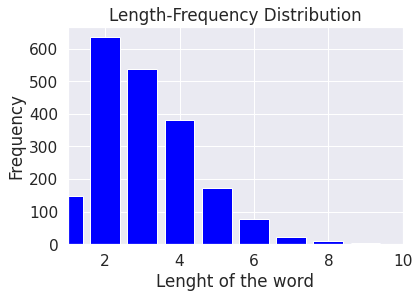

Maximum Length of a comment: 11
Minimum Length of a comment: 1
Average Length of a comment: 3.0


In [ ]:
frequency = dict()
for i in dataset.length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="blue")
plt.xlim(1, 10)

plt.xlabel('Lenght of the word')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a comment: {max(dataset.length)}")
print(f"Minimum Length of a comment: {min(dataset.length)}")
print(f"Average Length of a comment: {round(np.mean(dataset.length),0)}")

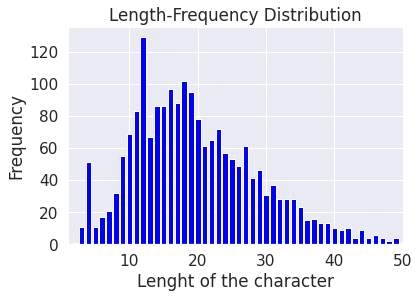

Maximum Length of a comment: 68
Minimum Length of a comment: 0
Average Length of a comment: 20.0


In [ ]:
frequency = dict()
for i in dataset.no_char:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="blue")
plt.xlim(1, 50)

plt.xlabel('Lenght of the character')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a comment: {max(dataset.no_char)}")
print(f"Minimum Length of a comment: {min(dataset.no_char)}")
print(f"Average Length of a comment: {round(np.mean(dataset.no_char),0)}")

# **Final Dataset**

In [ ]:
dataset=dataset.drop(["Sentence","Lower_Case","Stopwords"],axis=1)

In [ ]:
dataset.columns=["Class","length","no_char","CleanText"]

In [ ]:
dataset.head()

,Class,length,no_char,CleanText
0,Negative,4,20,think im waste money
1,Positive,2,18,incredible quality
2,Negative,3,16,dont waste money
3,Positive,1,10,disappoint
4,Negative,4,32,got inactive products unexpected


In [ ]:
dataset.shape

(1994, 4)

# **Data Set Summary**

In [ ]:
def data_summary(dataset):
    documents = []
    words = []
    most_frequent_word =[]
    u_words = []
   
    total_u_words = [word.strip().lower() for t in list(dataset.CleanText) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Class.value_counts().to_dict().items()]

    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Class==label].CleanText) for word in t.strip().split()]
        
        counts = dict()
        
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
      
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    
        documents.append(len(list(dataset[dataset.Class==label].CleanText)))
        
        words.append(len(word_list))
         
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of comments:{}".format(len(list(dataset[dataset.Class==label].CleanText))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:15]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

documents,words,u_words,class_names = data_summary(dataset)


Class Name :  Positive
Number of comments:1091
Number of Words:3331
Number of Unique Words:785
Most Frequent Words:

good	355
product	160
quality	129
price	110
best	65
better	43
products	38
prices	35
service	35
got	34
im	33
like	32
low	30
sound	29
delivery	28

Class Name :  Negative
Number of comments:903
Number of Words:2864
Number of Unique Words:947
Most Frequent Words:

quality	146
product	124
bad	101
good	82
clothes	47
match	32
products	31
money	29
like	28
didnt	27
dont	25
daraj	25
buy	25
price	24
fake	24
Total Number of Unique Words:1428


***New Dataframe for Data Summary***

In [ ]:
data_matrix = pd.DataFrame({'Total comments':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
data = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")

In [ ]:
data

,Class Names,Category,Values
0,Positive,Total comments,1091
1,Negative,Total comments,903
2,Positive,Total Words,3331
3,Negative,Total Words,2864
4,Positive,Unique Words,785
5,Negative,Unique Words,947


***Data Summary Visualization***

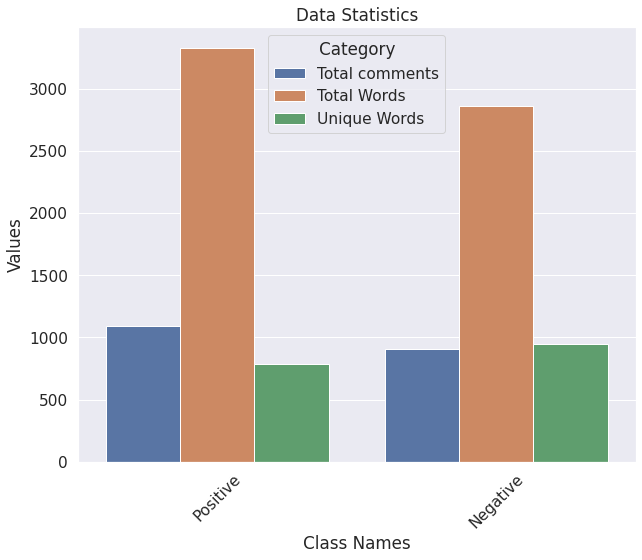

In [ ]:
plt.figure(figsize=(10, 8))
ax = plt.subplot()

sns.barplot(data=data,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

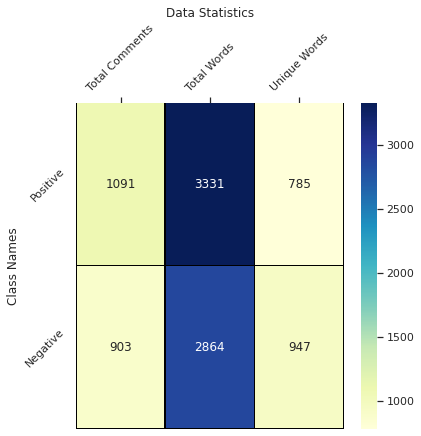

In [ ]:
sns.set()
plt.figure(figsize =(6, 6))
ax = plt.subplot()
sns.heatmap(data_matrix.iloc[:,0:3], annot=True,fmt="d", linewidths=0.5,linecolor = 'Black',cmap = "YlGnBu",ax = ax)

ax.set_ylabel('Class Names') 
ax.set_title('Data Statistics')
y_label = ["Total Comments", "Total Words", "Unique Words"] 
ax.xaxis.set_ticklabels(y_label, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
ax.xaxis.tick_top()

## **Label Encoding Function**

In [ ]:
sample_data=[10,100]

In [ ]:
def label_encoding(sentiment,bool):
  
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels)
    class_names =le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels
    

# **Dataset Splitting Function**

In [ ]:
def dataset_split(feature_space,sentiment):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [ ]:
dataset.head()

,Class,length,no_char,CleanText
0,Negative,4,20,think im waste money
1,Positive,2,18,incredible quality
2,Negative,3,16,dont waste money
3,Positive,1,10,disappoint
4,Negative,4,32,got inactive products unexpected


# ***Unigram Tf-idf value calculation***

In [ ]:
def calc_gram_tfidf(Conversations):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(Conversations)
    
    return tfidf,X

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
def ml_models_defination(): 
    
    lr_model = LogisticRegression()
    dt_model = DecisionTreeClassifier()
    rf_model = RandomForestClassifier()
    mnb_model = MultinomialNB(alpha=0.12)
    knn_model = KNeighborsClassifier(n_neighbors=3)
    svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
    sgd_model = SGDClassifier(loss = 'log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','SVM','sgd']
  
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,svm_model,sgd_model]

    return ml_models,model_names 

In [ ]:
def model_performace(model,X_train,X_test,y_train,y_test):
    
    my_dict = {}
    model.fit(X_train,y_train)
 
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100

    return my_dict 

In [ ]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])
        
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Multi. Naive Bayes','KNN','SVM','SGD']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,'Model Name':model_names })
    return performance_df

# **Unigram Distribution**

In [ ]:
x = ["This is the best phone in the budget."]

def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

get_top_n_words(x,3)

[('the', 2), ('this', 1), ('is', 1)]

# **Bigram Distribution**

In [ ]:
y = ["This is the best phone in the budget.	"]

In [ ]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(y,3)

[('this is', 1), ('is the', 1), ('the best', 1)]

# **Tigram Distribution**

In [ ]:
z = ["This is the best phone in the budget.	"]

In [ ]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(z,3)

[('this is the', 1), ('is the best', 1), ('the best phone', 1)]

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]


for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.CleanText)
    labels = label_encoding(dataset.Class,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}

    with open(f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy,f)

Feature Size :======> 6780

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1994 
	Training		 1595 
	Test			 399


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Feature Size :======> 6780

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1994 
	Training		 1595 
	Test			 399


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Feature Size :======> 6780

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1994 
	Training		 1595 
	Test			 399


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [ ]:
table = performance_table(accuracy)
df3 =pd.DataFrame(table)
table

,Accuracy,Precision,Recall,F1 Score,Model Name
0,79.95,77.69,87.85,82.46,Logistic Regression
1,78.70,82.41,76.64,79.42,Decision Tree
2,78.95,80.37,80.37,80.37,Random Forest
3,80.70,80.18,85.05,82.54,Multi. Naive Bayes
4,77.69,77.29,82.71,79.91,KNN
5,80.70,82.16,81.78,81.97,SVM
6,80.45,80.36,84.11,82.19,SGD


In [ ]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by 3 at = 80.7
Highest F1-Score achieved by 3 at = 82.54
Highest Precision Score achieved by 1 at = 82.41000000000001
Highest Recall Score achieved by 0 at = 87.85


In [ ]:
svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
svm_model.fit(X_train, y_train)
svm_model.score(X_test,y_test)

0.8070175438596491

In [ ]:
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)

[[147  38]
 [ 39 175]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       185
           1       0.82      0.82      0.82       214

    accuracy                           0.81       399
   macro avg       0.81      0.81      0.81       399
weighted avg       0.81      0.81      0.81       399



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
categories  = ['Negative','Positive']
group_names = ['True Negative','False Positive', 'False Negative','True Postive']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

In [ ]:
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

Text(0.5, 1.0, 'Confusion Matrix')

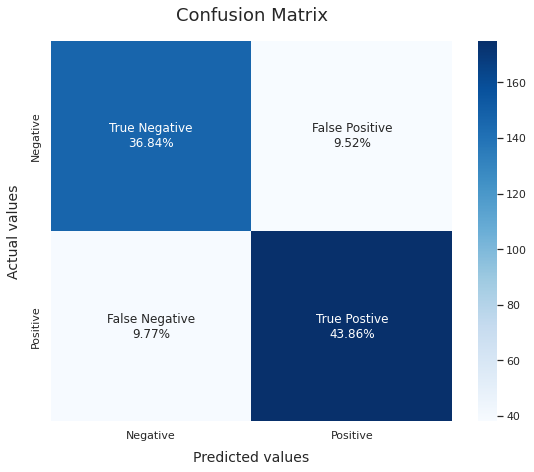

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

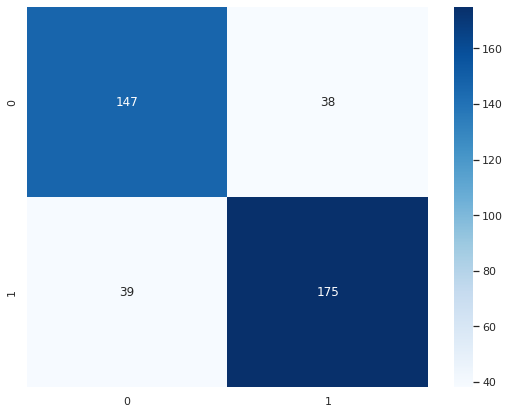

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(cf_matrix,cmap='Blues', annot=True,fmt='d')

In [ ]:
import pickle
file = open('cs_svm.pkl', 'wb')
pickle.dump(svm_model, file)

# **Machine Learning Prediction**

In [ ]:
model = open('cs_svm.pkl','rb')
svm_model = pickle.load(model)
Comment =  "This product is very good"
processed_conversation = process_text(Comment)
if (len(processed_conversation))>0:
    cv,feature_vector = calc_gram_tfidf(dataset.CleanText) 
    feature = cv.transform([processed_conversation]).toarray()
    Result = svm_model.predict(feature)
    if (Result == 0):
        print(f"Negative")
    else:
        print(f"Positive")
else:
    print("This conversation doesn't contains any bengali Words")

Positive


# **Tokenization**

In [ ]:
max_fatures = 500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(dataset['CleanText'].values)
X = tokenizer.texts_to_sequences(dataset['CleanText'].values)
X = pad_sequences(X)

In [ ]:
X

array([[  0,   0,   0, ...,  11,  54,  19],
       [  0,   0,   0, ...,   0, 296,   3],
       [  0,   0,   0, ...,  29,  54,  19],
       ...,
       [  0,   0,   0, ...,   0,   9,   3],
       [  0,   0,   0, ...,   0,   8, 146],
       [  0,   0,   0, ...,   3,   8,   1]], dtype=int32)

In [ ]:
np.shape(X)

(1994, 11)

# **Deep Learning Part**

In [ ]:
from nltk import word_tokenize
from collections import defaultdict
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
description_list = dataset['CleanText'].tolist()

In [ ]:
def count_top_x_words(corpus, top_x, skip_top_n):
    count = defaultdict(lambda: 0)
    for c in corpus:
        for w in word_tokenize(c):
            count[w] += 1
    count_tuples = sorted([(w, c) for w, c in count.items()], key=lambda x: x[1], reverse=True)
    return [i[0] for i in count_tuples[skip_top_n: skip_top_n + top_x]]

In [ ]:
def replace_top_x_words_with_vectors(corpus, top_x):
    topx_dict = {top_x[i]: i for i in range(len(top_x))}

    return [
        [topx_dict[w] for w in word_tokenize(s) if w in topx_dict]
        for s in corpus
    ], topx_dict

In [ ]:
def filter_to_top_x(corpus, n_top, skip_n_top=0):
    top_x = count_top_x_words(corpus, n_top, skip_n_top)
    return replace_top_x_words_with_vectors(corpus, top_x)

In [ ]:
counter = Counter(dataset['Class'].tolist())
counter 

Counter({'Negative': 903, 'Positive': 1091})

In [ ]:
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common())}

dataset[dataset['Class'].map(lambda x: x in top_10_varieties)]

varietal_list = [top_10_varieties[i] for i in dataset['Class'].tolist()]

varietal_list = np.array(varietal_list)

varietal_list

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
from keras_preprocessing.sequence import pad_sequences
import keras
keras.utils.data_utils.pad_sequences 

<function keras.utils.data_utils.pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)>

In [ ]:
from keras_preprocessing.sequence import pad_sequences
print(pad_sequences)

<function pad_sequences at 0x7f4cb6e93280>


In [ ]:
mapped_list, word_list = filter_to_top_x(description_list, 2500, 10)
max_review_length = 150

varietal_list_cat = to_categorical(varietal_list)

mapped_list = pad_sequences(mapped_list, maxlen=150)

train_x, test_x, train_y, test_y = train_test_split(mapped_list, varietal_list_cat, test_size=0.2)

In [ ]:
train_x.shape

(1595, 150)

In [ ]:
embed_dim = 64
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 11, 64)            32000     
                                                                 
 lstm_10 (LSTM)              (None, 64)                33024     
                                                                 
 dense_14 (Dense)            (None, 2)                 130       
                                                                 
Total params: 65,154
Trainable params: 65,154
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(2500, 64, input_length=150))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(varietal_list) + 1, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(train_x, train_y, epochs = 150, batch_size=32, verbose = 1,validation_data=(test_x,test_y))

Epoch 1/150
50/50 [==============================] - 9s 118ms/step - loss: 0.6922 - accuracy: 0.5442 - val_loss: 0.6836 - val_accuracy: 0.5589
Epoch 2/150
50/50 [==============================] - 3s 66ms/step - loss: 0.6721 - accuracy: 0.6257 - val_loss: 0.6405 - val_accuracy: 0.7068
Epoch 3/150
50/50 [==============================] - 4s 85ms/step - loss: 0.4714 - accuracy: 0.8125 - val_loss: 0.5083 - val_accuracy: 0.7368
Epoch 4/150
50/50 [==============================] - 6s 120ms/step - loss: 0.2691 - accuracy: 0.8934 - val_loss: 0.5919 - val_accuracy: 0.7494
Epoch 5/150
50/50 [==============================] - 4s 79ms/step - loss: 0.1860 - accuracy: 0.9204 - val_loss: 0.6805 - val_accuracy: 0.7669
Epoch 6/150
50/50 [==============================] - 4s 77ms/step - loss: 0.1473 - accuracy: 0.9361 - val_loss: 0.6570 - val_accuracy: 0.7193
Epoch 7/150
50/50 [==============================] - 5s 96ms/step - loss: 0.1264 - accuracy: 0.9448 - val_loss: 0.7556 - val_accuracy: 0.7018
Epoc

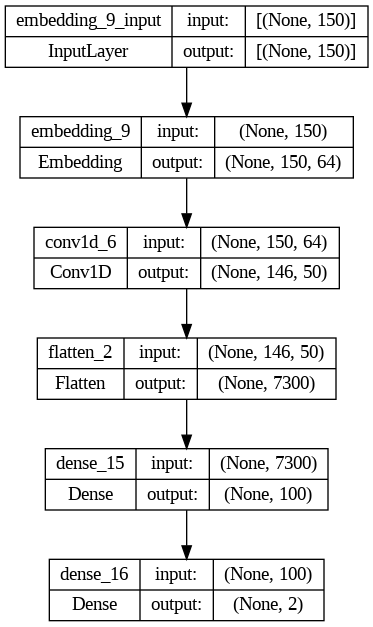

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# **Model Visualization**

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-97b8a_10
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-97b8a_10
  Resolved https://github.com/paulgavrikov/visualkeras to commit d7111d3471173c0b16853a6ce5e4cc645498380a
  Preparing metadata (setup.py) ... done


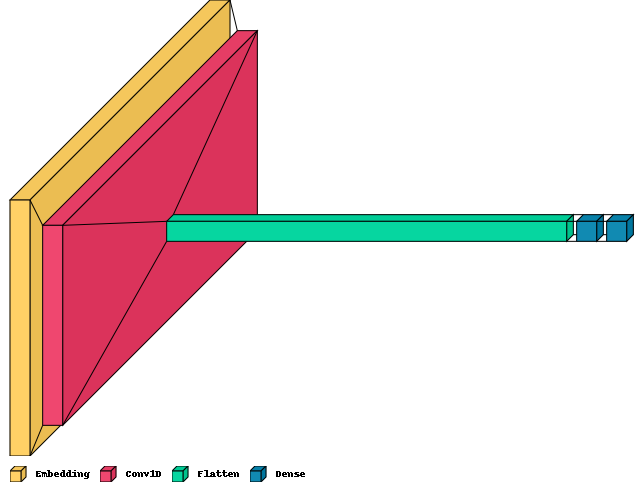

In [ ]:
from tensorflow.keras.models import Model
!pip install git+https://github.com/paulgavrikov/visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True) 

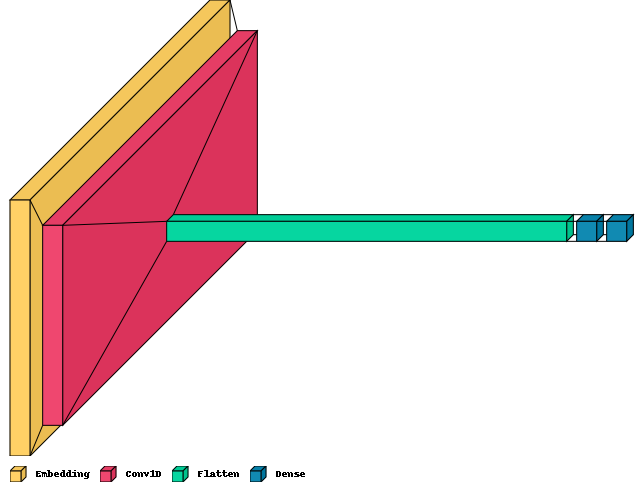

In [ ]:
visualkeras.layered_view(model, legend=True) 

# **Evaluation**

In [ ]:
score = model.evaluate(train_x, train_y,batch_size=64, verbose=2)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

25/25 - 0s - loss: 0.0831 - accuracy: 0.9574 - 359ms/epoch - 14ms/step
Train loss: 0.08306268602609634
Train accuracy: 0.9573667645454407


In [ ]:
score = model.evaluate(test_x, test_y,batch_size=64, verbose=2)
print('Test loss:', score[0])
acc=score[1]
print('Test accuracy:', acc)


7/7 - 0s - loss: 2.5733 - accuracy: 0.6842 - 111ms/epoch - 16ms/step
Test loss: 2.5733273029327393
Test accuracy: 0.6842105388641357


# **Learning Curve**

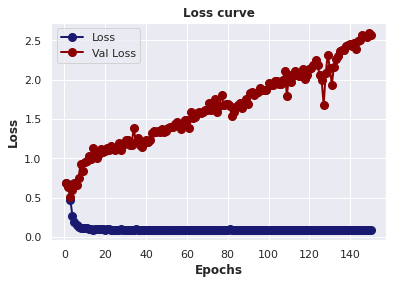

In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
sns.set_style('darkgrid')


plt.plot(epochs, loss_values, color='midnightblue', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_loss_values, color='darkred', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Loss curve',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Loss',fontsize=12,fontweight='bold')
plt.legend(['Loss','Val Loss'])
                  

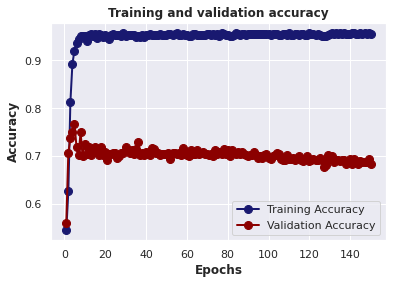

In [ ]:
plt.plot(epochs, acc, color='midnightblue', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_acc, color='darkred', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation accuracy',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Accuracy',fontsize=12,fontweight='bold')
plt.legend(['Training Accuracy','Validation Accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


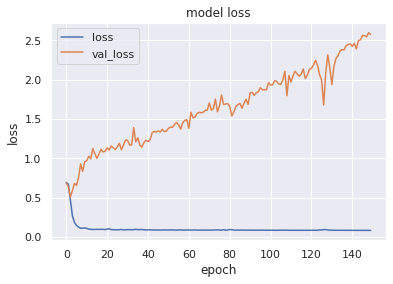

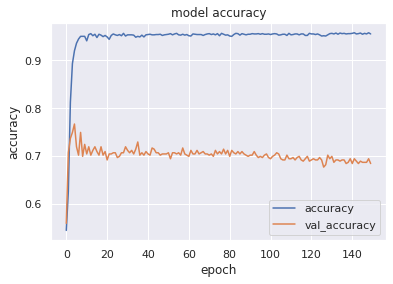

In [ ]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

# **Confusion Matrix & Classification Report**

In [ ]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((1595, 150), (1595, 2), (399, 150), (399, 2))

In [ ]:
y_pred=model.predict(test_x) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(test_y, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

13/13 [==============================] - 0s 9ms/step
[[183  40]
 [ 86  90]]


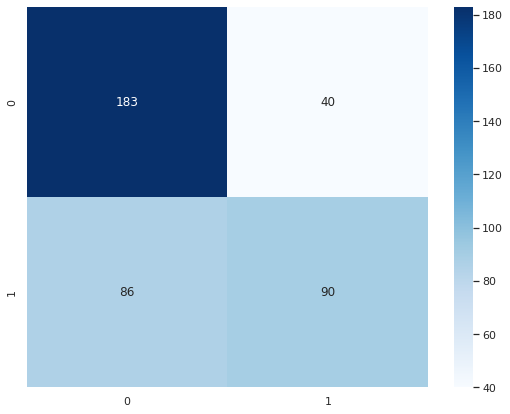

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(cm,cmap='Blues', annot=True,fmt='d')
plt.show()


In [ ]:
report = pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).transpose()

In [ ]:
report = report.rename(index={'0': 'Positive','1':'Negative'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))

In [ ]:
report

,precision,recall,f1-score,support
Positive,68.03,82.06,74.39,223.000000
Negative,69.23,51.14,58.82,176.000000
accuracy,68.42,68.42,68.42,0.684211
macro avg,68.63,66.60,66.61,399.000000
weighted avg,68.56,68.42,67.52,399.000000
